In [1]:
#By Xin Lin
import pandas as pd
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [72]:
df = pd.read_csv('../input/Data_fulll.csv')
df.date = pd.to_datetime(df.date)
df.drop('text',inplace=True,axis=1)
df.dropna(axis=0,inplace= True)

C:\Users\lin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [131]:
df.head(2)

,business_id,name,is_open,review_count,address,city,Restaurant_Star,funny,user_id,Review_Star,date,useful,cool,Month,WDay
0,72956,Brick House Tavern + Tap,1,116,581 Howe Ave,Cuyahoga Falls,3.5,0.0,823046.0,4.0,2016-05-05,0.0,0.0,5,3
1,72956,Brick House Tavern + Tap,1,116,581 Howe Ave,Cuyahoga Falls,3.5,0.0,1070670.0,2.0,2017-03-19,0.0,0.0,3,6


## Let's do some exploratory data analysis
- First check the shape of our data
- we have about 300million rows and 13 features let's see if we can find some interesting patterns in this huge dataset

In [22]:
df.shape

(3215699, 13)

- Our data contains reviews for 54313 restaurants from 907911 users

In [40]:
print('Number of Restaurant:',len(set(df.business_id)),'Number of Users:',len(set(df.user_id)))

Number of Restaurant: 54313 Number of Users: 907911


## Let's check the Restaurant Star distribution plot
- About 80% of restaurants get stars between 3.0 to 4.5
- Only 2% of restaurants get 5 stars


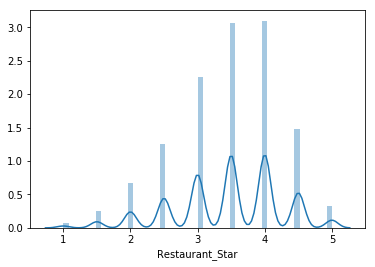

In [6]:
sns.distplot(df.groupby('business_id')['Restaurant_Star'].mean())

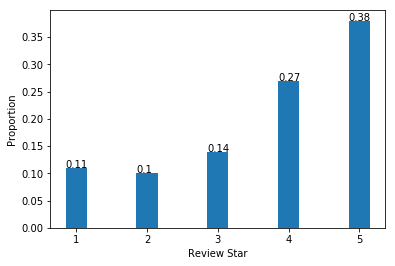

In [110]:
a  =df['Review_Star'].value_counts()/3215699
a = a.sort_index()
import numpy as np

x = a.index
y = np.round(a.values,2)
plt.bar(x,y,width = 0.3)
for i, v in zip(x,y):
    plt.text(i-0.15 , v+0.0005 , str(v))
plt.xlabel('Review Star')
plt.ylabel('Proportion')
plt.show()

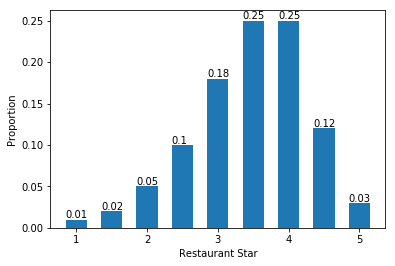

In [111]:
a = pd.DataFrame(df.groupby(['business_id'])['Restaurant_Star'].mean())['Restaurant_Star'] \
     .value_counts()/54313
a = a.sort_index()   

# plt.figure(figsize=(10,10))
x = a.index
y = np.round(a.values,2)
plt.bar(x,y,width = 0.3)
for i, v in zip(x,y):
    plt.text(i-0.15 , v+0.002 , str(v))
plt.xlabel('Restaurant Star')
plt.ylabel('Proportion')
plt.show()

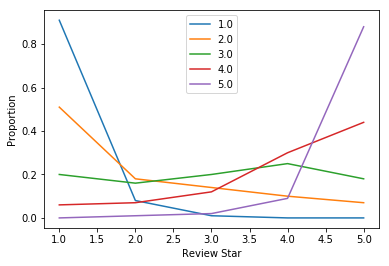

In [104]:
for i in np.arange(1,5.5):
    tmp = df[df['Restaurant_Star']==i]
    tmp = tmp['Review_Star'].value_counts().sort_index()/tmp.shape[0]
    x = tmp.index
    y = np.round(tmp.values,2)
    plt.plot(x,y,label = i)
plt.xlabel('Review Star')
plt.ylabel('Proportion')
plt.legend()

In [ ]:
y = a.values

## Let's see if there is any relationship between review counts and stars for each restaurant

- Restaurant with 4 stars get most reviews compared with others
- Notice 5 star restaurant get fewer reviews than restaurant with lower stars, maybe 5 star restaurant get the star because of the lack of reviews

Text(0,0.5,'Average Review Count')

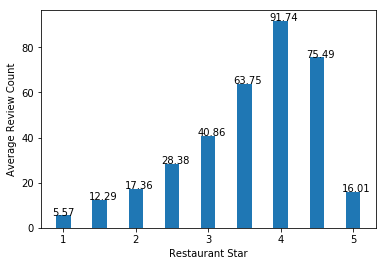

In [125]:
tmp = df[['business_id','review_count','Restaurant_Star']].drop_duplicates()
tmp = tmp.groupby('Restaurant_Star') \
['review_count'].mean()
x = tmp.index
y = np.round(tmp.values,2)
plt.bar(x,y,width = 0.2)
for i, v in zip(x,y):
    plt.text(i-0.15 , v+0.003 , str(v))
plt.xlabel('Restaurant Star')
plt.ylabel('Average Review Count')

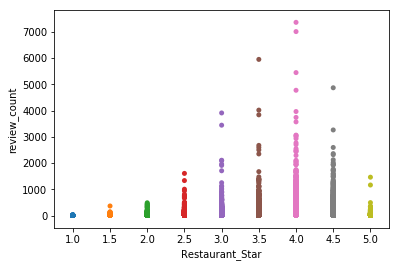

In [69]:
sns.stripplot(x="Restaurant_Star", y="review_count", data=tmp)

## Relation between number of restaurant in the city and it's mean star
- check if number of restaurants in the city will affect this city's restaurant star
- In the scatter plot we can see most of cities has restaurants less than 500, and we can't get much information from restaurant numbers in the city but we will keep this feature to see if it helps in our future model

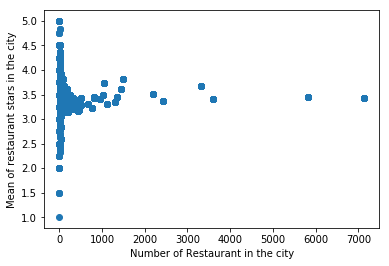

In [94]:
tmp = df[['business_id','city','Restaurant_Star']].drop_duplicates()

gp = tmp.groupby(['city'])['business_id'].count().reset_index().rename(index=str, columns={'business_id':'Restaurant_Number' })
tmp = tmp.merge(gp,on = 'city')

gp = tmp.groupby(['city'])['Restaurant_Star'].mean().reset_index().rename(index=str, columns={'Restaurant_Star':'City_Mean_Star' })
tmp = tmp.merge(gp,on = 'city')

plt.scatter(tmp['Restaurant_Number'],tmp['City_Mean_Star'])
plt.xlabel('Number of Restaurant in the city')
plt.ylabel('Mean of restaurant stars in the city')
plt.show()

## Then we check if there is time pattern for review stars
- In first plot we see that people trend to give higher score at the begining of the year
- In second plot we plot the mean review star in different day of the week, people tend to give high score at middle of the week.

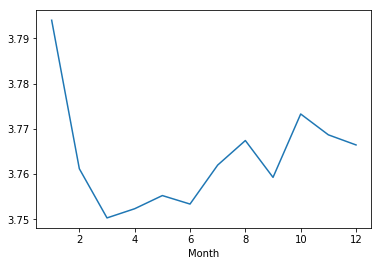

In [128]:
tmp = df[df['date']>'2017-01-01']
tmp = tmp[tmp['date']<'2018-01-01']
# tmp = df
tmp['Month'] = tmp['date'].dt.month
tmp['WDay'] = tmp['date'].dt.dayofweek
tmp.groupby(['Month'])['Review_Star'].mean().plot()

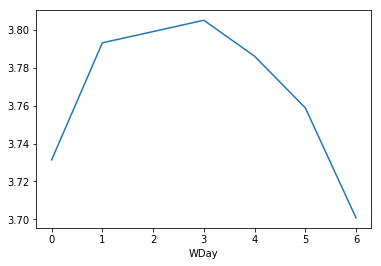

In [143]:
tmp.groupby(['WDay'])['Review_Star'].mean().plot()

- These two plots show number of reviews related to date and time
- First one shows that number of reviews experienced a sharp cutoff at the end of the year
- Second one shows that number of reviews made on weekend is more than on weekdays

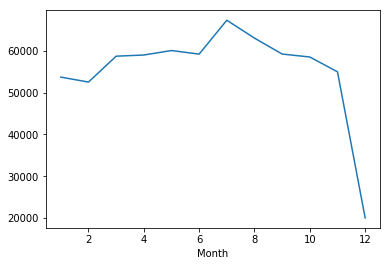

In [146]:
tmp.groupby(['Month'])['Review_Star'].count().plot()

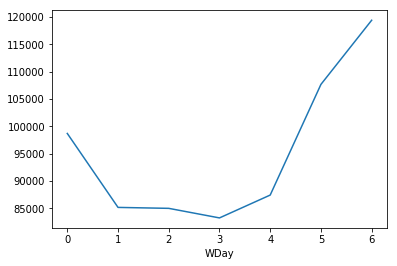

In [145]:
tmp.groupby(['WDay'])['Review_Star'].count().plot()

## Number of Reviews each user made
- plot below shows that most of users did less than 5 reviews
- But there are users made more than 500 reviews which seems impossible we may delete review record related to these unnormal users

In [128]:
tmp = df.groupby('user_id')['business_id'].count().reset_index(). \
rename(index=str, columns={'business_id':'Num_of_Reviews'})

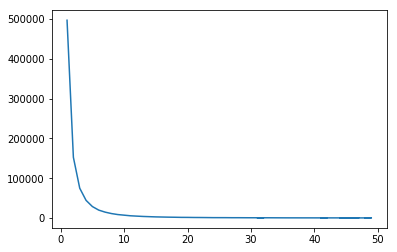

In [134]:
tmp[tmp.Num_of_Reviews<50].Num_of_Reviews.value_counts().plot()

In [141]:
tmp.Num_of_Reviews.value_counts().sort_index(ascending = False)[:10]

2208    1
1306    1
899     1
897     1
882     1
847     1
831     1
667     1
636     1
629     1
Name: Num_of_Reviews, dtype: int64